# **IMPORTING REQUIRED LIBRARIES AND DATA**

In [4]:
%%capture
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn
import io
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from autoviz.AutoViz_Class import AutoViz_Class
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
import math
from numpy.random import seed
seed(1)
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
%%capture
pip install autoviz

In [5]:
from google.colab import files 
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [6]:
#reading the CSV file
life_expectancy = pd.read_csv(io.BytesIO(uploaded['Life Expectancy Data.csv']))

# **PREPROCESSING THE DATA**

In [7]:
#filtering out data from all the years that are not 2014
life_expectancy = life_expectancy[(life_expectancy.Year == 2014)].iloc[:,0:]

In [8]:
#showing the number number of NaN values
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      life_expectancy.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             1
percentage expenditure              0
Hepatitis B                        10
Measles                             0
 BMI                                2
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                28
Population                         41
 thinness  1-19 years               2
 thinness 5-9 years                 2
Income composition of resources    10
Schooling                          10
dtype: int64


In [9]:
#separating the predictor variables we want to impute
impute = life_expectancy.iloc[:,3:]
#using the IterativeImputer method which ...
imp = IterativeImputer(max_iter=10, random_state=0)
impute_transformed = imp.fit_transform(impute)

for row in range(len(life_expectancy)):
  for col in range(3, len(life_expectancy.iloc[0,:])):
    life_expectancy.iloc[row,col] = impute_transformed[row, col-3]

#resetting the indeces
life_expectancy = life_expectancy.reset_index(drop=True)

In [10]:
#showing the final shape of the data
life_expectancy.shape

(183, 22)

In [11]:
#creating instance of the autoviz class that will help us do some exploratory data analysis
AV = AutoViz_Class()

In [12]:
sep = ','
target = 'Life expectancy '
datapath = ''
filename = 'life_expectancy.csv'

Shape of your Data Set loaded: (183, 22)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    21 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables

################ Regression VISUALIZATION Started #####################


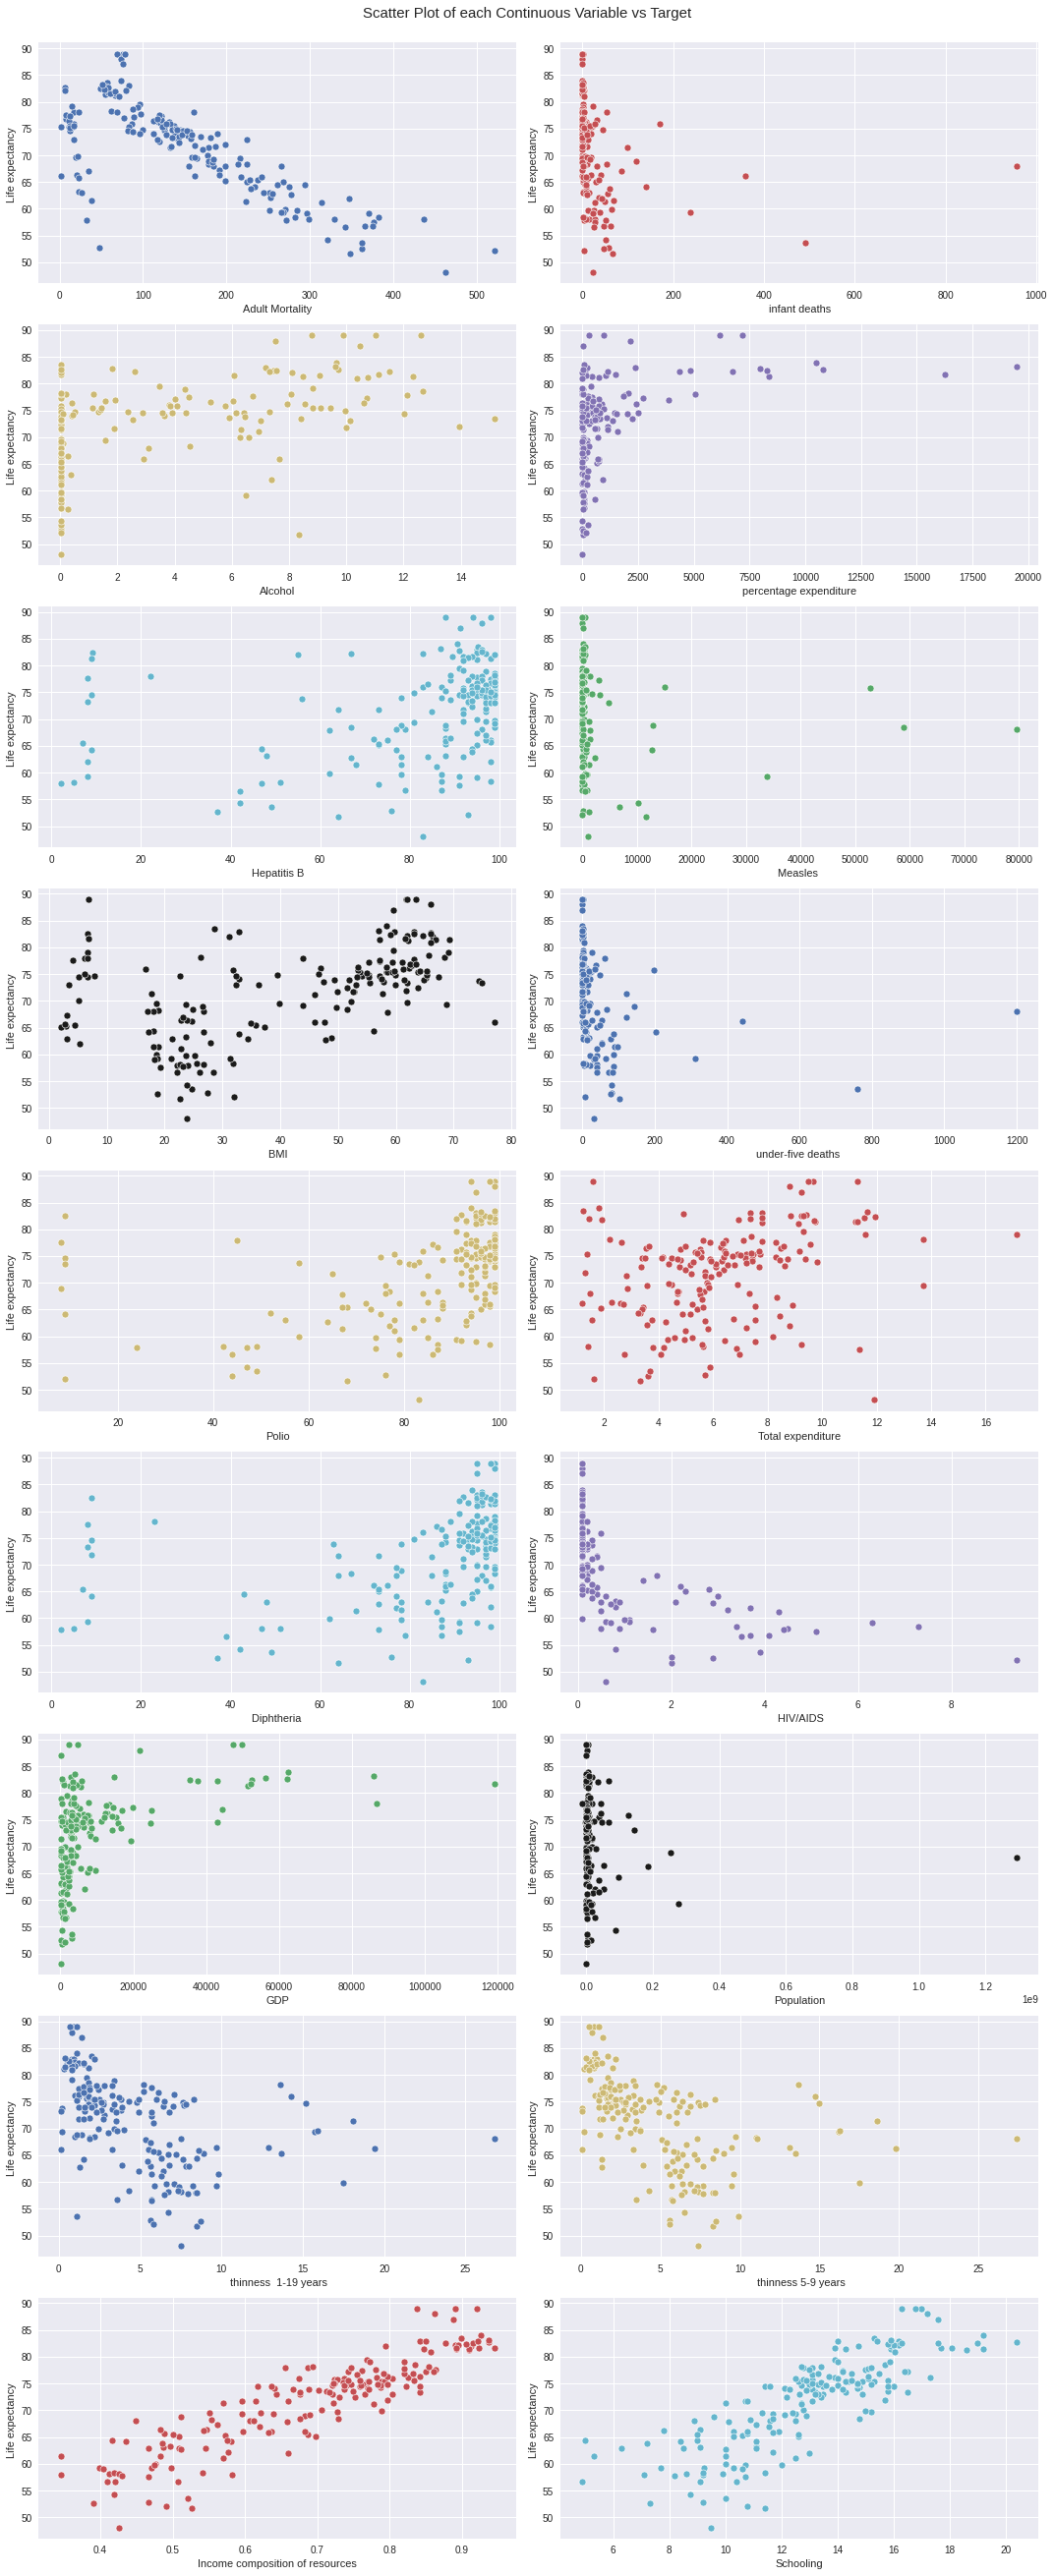

Number of All Scatter Plots = 171


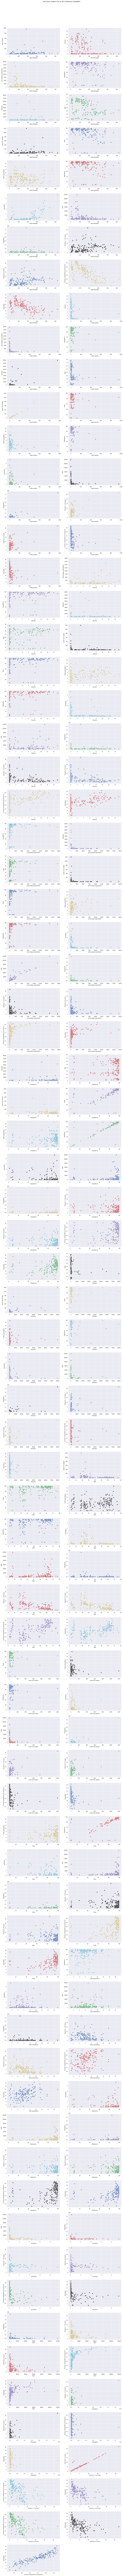

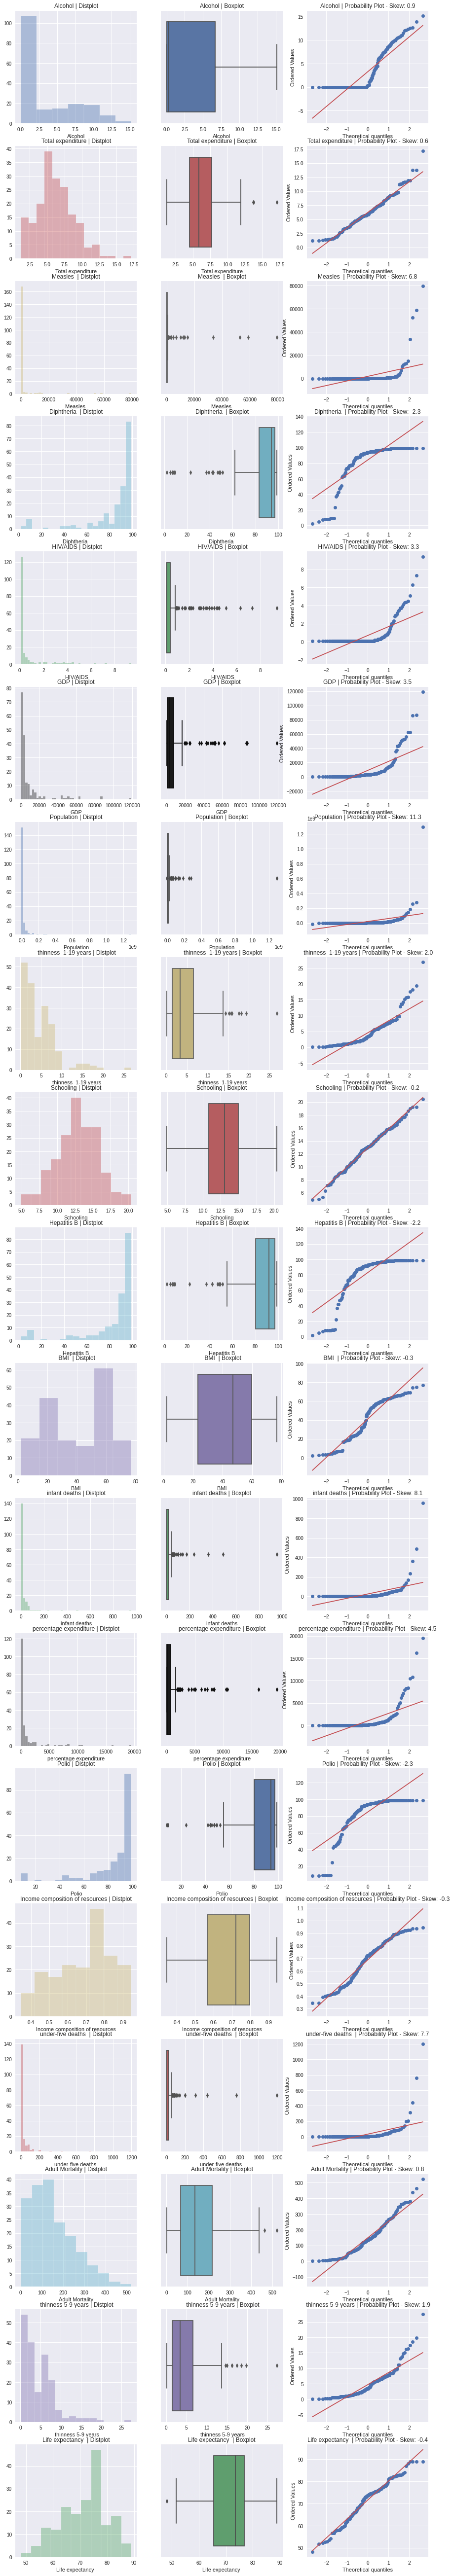

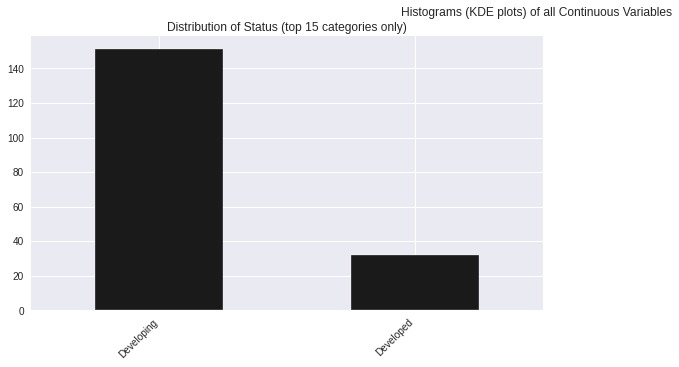

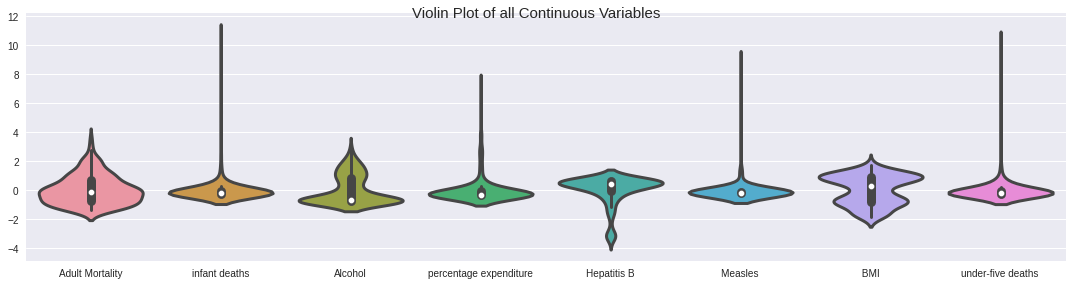

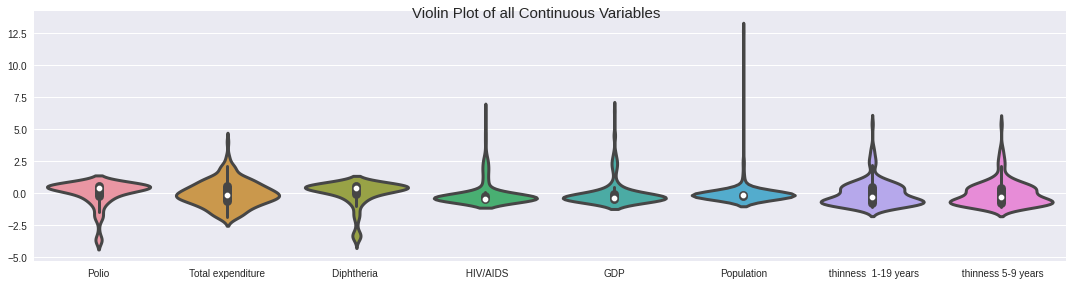

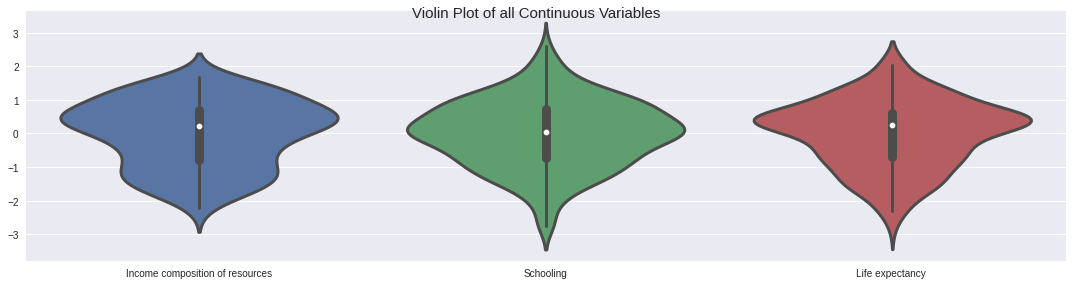

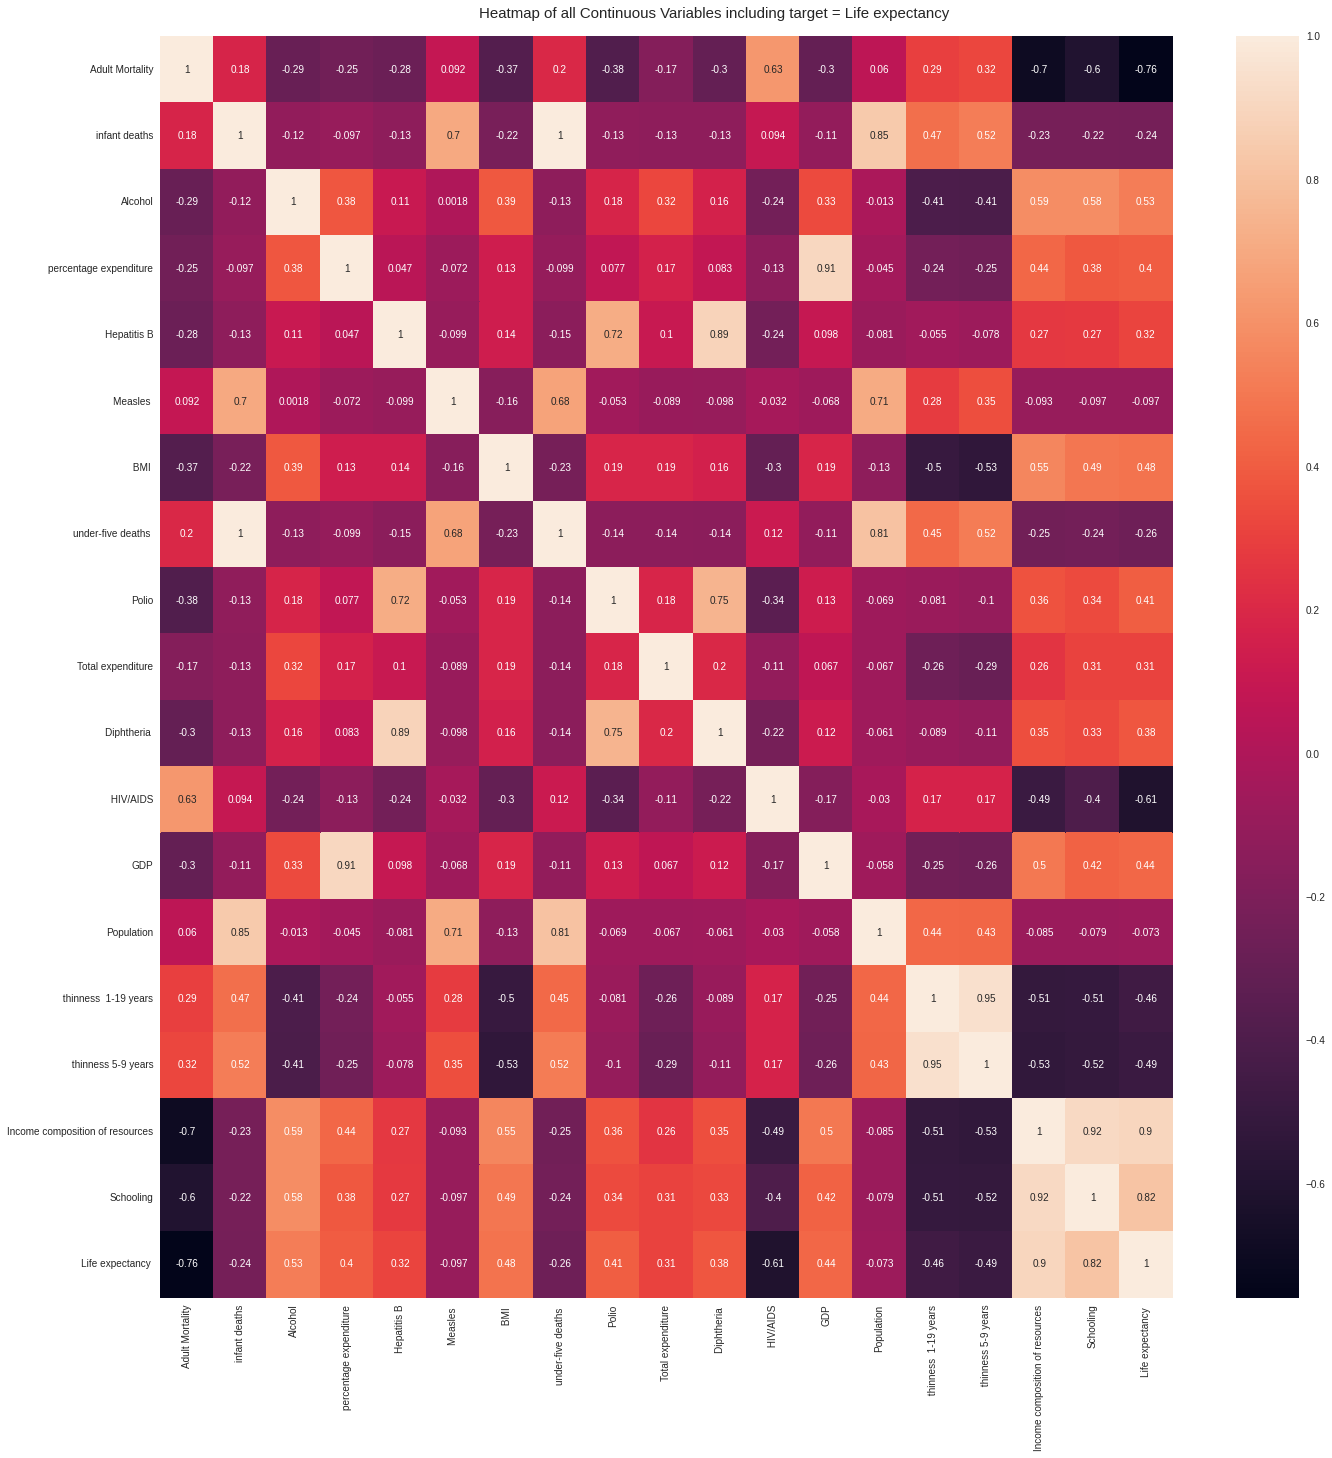

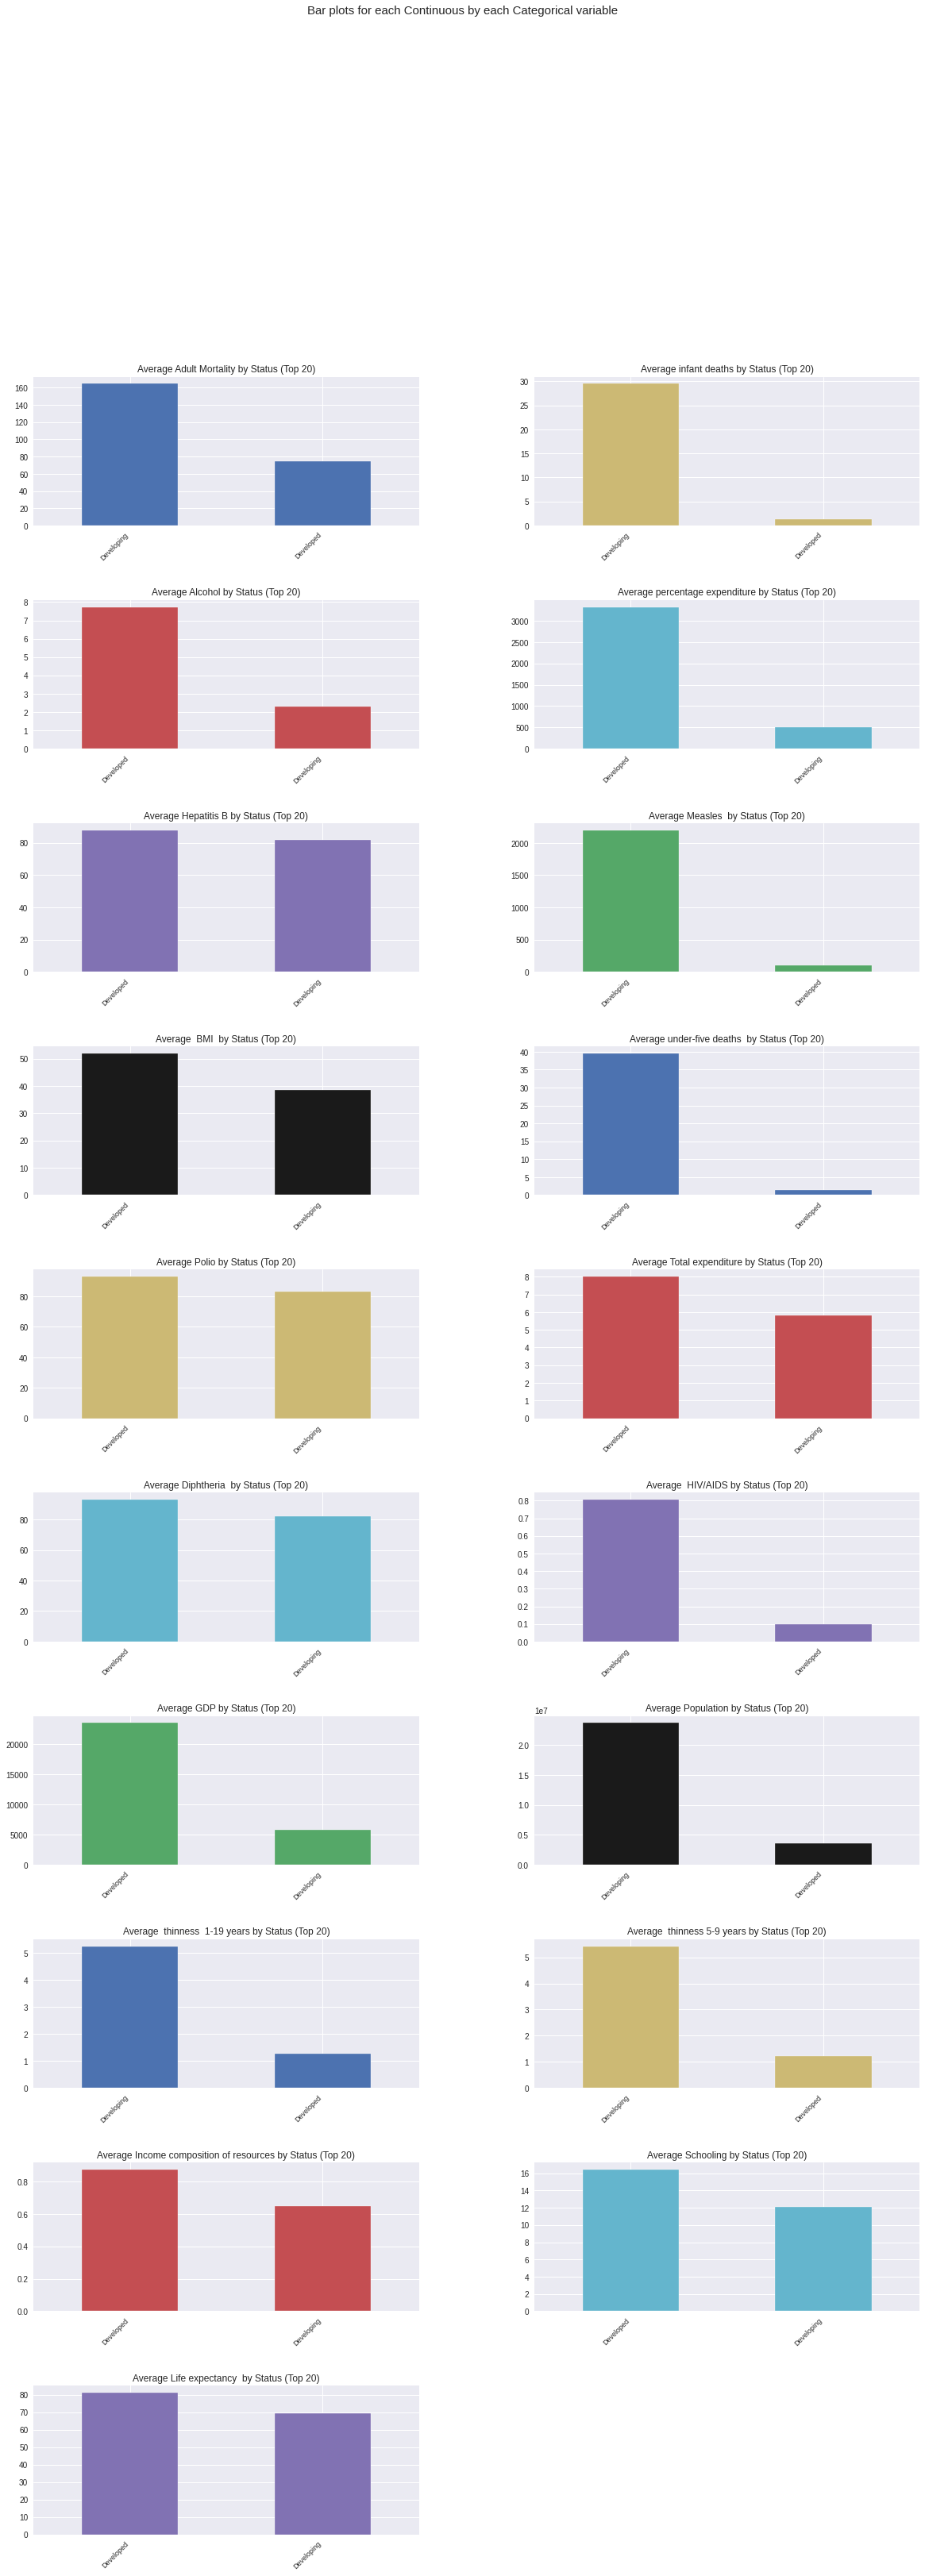

All Plots done
Time to run AutoViz (in seconds) = 85

 ###################### VISUALIZATION Completed ########################


In [13]:
dft = AV.AutoViz('', sep, target, life_expectancy)

In [14]:
#showing the first 10 rows of the resulting dataset
life_expectancy.head(10)

Country  Year  ... Income composition of resources  Schooling
0          Afghanistan  2014  ...                           0.476       10.0
1              Albania  2014  ...                           0.761       14.2
2              Algeria  2014  ...                           0.741       14.4
3               Angola  2014  ...                           0.527       11.4
4  Antigua and Barbuda  2014  ...                           0.782       13.9
5            Argentina  2014  ...                           0.825       17.3
6              Armenia  2014  ...                           0.739       12.7
7            Australia  2014  ...                           0.936       20.4
8              Austria  2014  ...                           0.892       15.9
9           Azerbaijan  2014  ...                           0.752       12.2

[10 rows x 22 columns]

# **Linear Regression MODEL**

In [32]:
#splitting the dataset into independent and dependent variables
X = life_expectancy[['Adult Mortality', 'infant deaths', 'Hepatitis B', 'Measles ', 'Alcohol', 'under-five deaths ', 'percentage expenditure', 'Polio', ' BMI ', 'Diphtheria ', 'Total expenditure', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = life_expectancy['Life expectancy ']

In [16]:
#splitting the data into train and test 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
#predicting outcome variable using the test part of our dataset
y_prediction = LR.predict(x_test)
#Printing model metrics such as MSE< RMSE and R2
mse = mean_squared_error(y_test, y_prediction)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_prediction)
print("R2:", r2)

MSE: 16.752228683380796
RMSE: 4.092948653890102
R2: 0.7482691098046683


Here, we will test three different multivariate regression models with the variables chosen using leaps library in R

In [17]:
reg_model1_x = life_expectancy[['Adult Mortality',' HIV/AIDS', 'Income composition of resources']] 
reg_model1_y = life_expectancy['Life expectancy ']

In [18]:
reg_model2_x = life_expectancy[['Adult Mortality',' HIV/AIDS', 'Income composition of resources', 'Total expenditure']] 
reg_model2_y = life_expectancy['Life expectancy ']

In [19]:
reg_model3_x = life_expectancy[['Adult Mortality',' HIV/AIDS', 'Income composition of resources', 'Total expenditure', 'Hepatitis B']] 
reg_model3_y = life_expectancy['Life expectancy ']

In [20]:
#calculating model metrics for our three models
reg_models_x = [reg_model1_x, reg_model2_x, reg_model3_x]
reg_models_y = [reg_model1_y, reg_model2_y, reg_model3_y]

for i in range(len(reg_models_x)):
  x_train, x_test, y_train, y_test = train_test_split(reg_models_x[i], reg_models_y[i], test_size=0.33, random_state=42)
  # creating an object of LinearRegression class
  LR = LinearRegression()
  # fitting the training data
  LR.fit(x_train,y_train)
  #predicting outcome variable using the test part of our dataset
  y_prediction = LR.predict(x_test)
  #Printing model metrics such as MSE< RMSE and R2
  print('Model #', i+1)
  mse = mean_squared_error(y_test, y_prediction)
  print("MSE:", mse)
  rmse = np.sqrt(mse)
  print("RMSE:", rmse)
  r2 = r2_score(y_test, y_prediction)
  print("R2:", r2)


Model # 1
MSE: 9.943511559678694
RMSE: 3.1533334044592705
R2: 0.8505817307121231
Model # 2
MSE: 10.074213297879323
RMSE: 3.1739901225239064
R2: 0.8486177135339215
Model # 3
MSE: 9.925609379002697
RMSE: 3.1504935135630254
R2: 0.8508507415979687


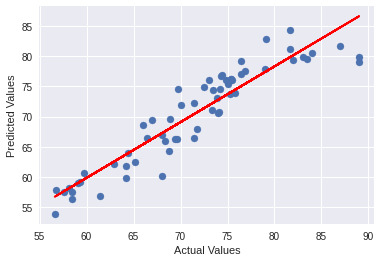

In [21]:
#plotting actual vs predicted values
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
z = np.polyfit(y_test, y_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

# **RANDOM FOREST MODEL**

MSE: 9.423193583675658
RMSE: 3.069722069451184
R2: 0.8584003982911907


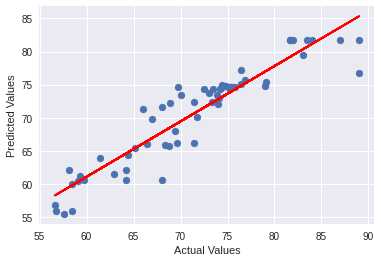

In [23]:
#Implementing RandomForestRegression model 
regr = RandomForestRegressor(max_depth=2, n_estimators = 100, random_state=0)
regr.fit(x_train, y_train)
y_prediction_forest =  regr.predict(x_test)

#printing out model metrics
mse_forest = mean_squared_error(y_test, y_prediction_forest)
print("MSE:", mse_forest)
rmse_forest = np.sqrt(mse_forest)
print("RMSE:", rmse_forest)
r2_forest = r2_score(y_test, y_prediction_forest)
print("R2:", r2_forest)

#plotting __
plt.scatter(y_test, y_prediction_forest)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
z = np.polyfit(y_test, y_prediction_forest, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

In [24]:
#selecting features that have higher than mean importance
sel = SelectFromModel(RandomForestRegressor(max_depth=2, n_estimators = 100, random_state=0))
sel.fit(x_train, y_train)

#calling the function that will show us the names of the features
sel.get_support()

#printing the names
selected_feat= x_train.columns[(sel.get_support())]
print(selected_feat)

Index(['Income composition of resources'], dtype='object')


In [25]:
#subsetting the festures chosed by SelectFromModel function
random_forest_selected_x = life_expectancy[['Adult Mortality',' HIV/AIDS', 'Income composition of resources', 'Schooling']] 
random_forest_selected_y = life_expectancy['Life expectancy ']

#splitting the data into training and test
x_train_forest, x_test_forest, y_train_forest, y_test_forest = train_test_split(random_forest_selected_x, random_forest_selected_y, test_size=0.33, random_state=42)

MSE: 9.282037177176596
RMSE: 3.0466435920823747
R2: 0.8605215147429995


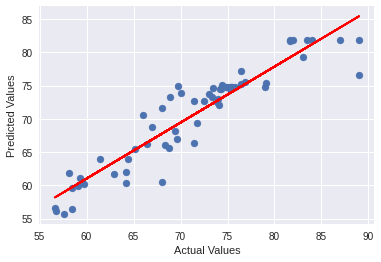

In [26]:
#fitting the model again only with the highly important features
regr = RandomForestRegressor(max_depth=2, n_estimators = 100, random_state=0)
regr.fit(x_train_forest, y_train_forest)
y_prediction_forest =  regr.predict(x_test_forest)

#printing out model metrics
mse_forest = mean_squared_error(y_test_forest, y_prediction_forest)
print("MSE:", mse_forest)
rmse_forest = np.sqrt(mse_forest)
print("RMSE:", rmse_forest)
r2_forest = r2_score(y_test_forest, y_prediction_forest)
print("R2:", r2_forest)

#plotting __
plt.scatter(y_test, y_prediction_forest)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
z = np.polyfit(y_test, y_prediction_forest, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

# **XGBoost Model**

[15:56:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE: 6.481141923619072
RMSE: 2.5458086973728156
R2: 0.9026097567821849


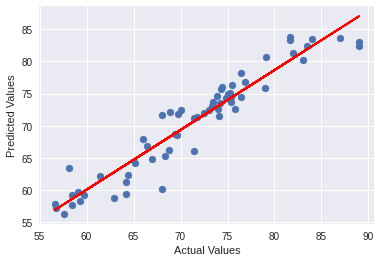

In [33]:
#Implementing an XGBoost Regressor model
XGB = XGBRegressor()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
XGB.fit(x_train, y_train)
y_prediction_XGB =  XGB.predict(x_test)

#printing model metrics results
mse_XGB = mean_squared_error(y_test, y_prediction_XGB)
print("MSE:", mse_XGB)
rmse_XGB = np.sqrt(mse_XGB)
print("RMSE:", rmse_XGB)
r2_XGB = r2_score(y_test, y_prediction_XGB)
print("R2:", r2_XGB)

#plotting ___
plt.scatter(y_test, y_prediction_XGB)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
z = np.polyfit(y_test, y_prediction_XGB, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')
plt.show()

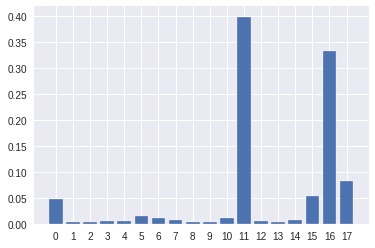

                            columns  importances
11                         HIV/AIDS     0.399125
16  Income composition of resources     0.332679
17                        Schooling     0.082729
15               thinness 5-9 years     0.053476
0                   Adult Mortality     0.046893
5                under-five deaths      0.014152
10                Total expenditure     0.011637
6            percentage expenditure     0.010312
14             thinness  1-19 years     0.007078
7                             Polio     0.006414
3                          Measles      0.006356
12                              GDP     0.006069
4                           Alcohol     0.004776
9                       Diphtheria      0.004399
1                     infant deaths     0.003795
8                              BMI      0.003716
2                       Hepatitis B     0.003515
13                       Population     0.002880


In [35]:
%matplotlib inline
#plotting importance of different variables in XGBoost
plt.bar(range(len(XGB.feature_importances_)), XGB.feature_importances_)
plt.xticks(np.arange(0, 18, step=1))
plt.show()

results=pd.DataFrame()
results['columns']=X.columns
results['importances'] = XGB.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)
print(results)

[15:56:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
18
MSE: 6.481141923619072
RMSE: 2.5458086973728156
R2: 0.9026097567821849


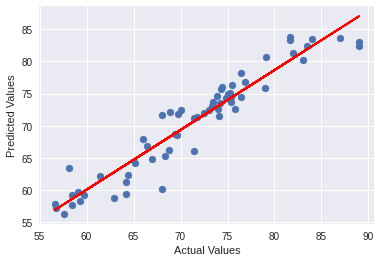

______________
[15:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
17
MSE: 6.279717385354079
RMSE: 2.505936428833357
R2: 0.9056365050007628


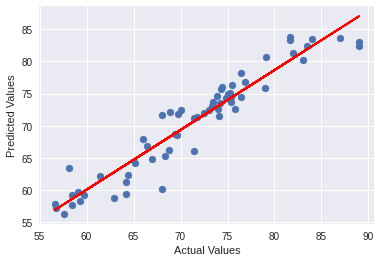

______________
[15:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
16
MSE: 6.209946302894244
RMSE: 2.491976384898991
R2: 0.906684934856244


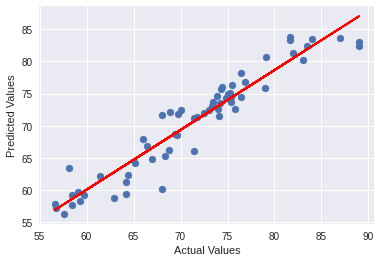

______________
[15:56:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
15
MSE: 5.893292128227092
RMSE: 2.4276103740565724
R2: 0.9114432054588958


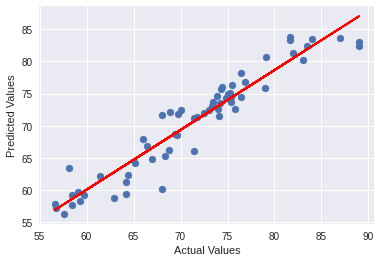

______________
[15:56:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
14
MSE: 5.922526394087597
RMSE: 2.4336241275282418
R2: 0.911003910609932


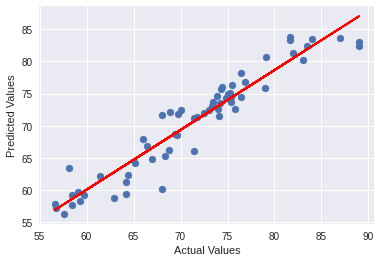

______________
[15:56:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
13
MSE: 6.071766423665601
RMSE: 2.4640954574986744
R2: 0.9087613238945466


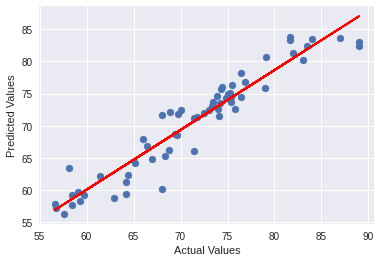

______________
[15:56:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
12
MSE: 6.156181892901163
RMSE: 2.481165430377661
R2: 0.9074928370789382


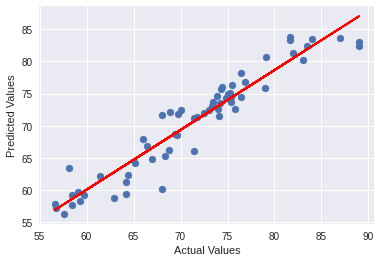

______________
[15:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
11
MSE: 7.14087979417884
RMSE: 2.672242465454593
R2: 0.892696066813498


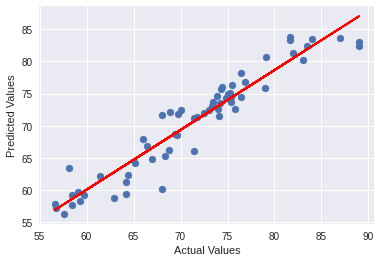

______________
[15:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
10
MSE: 6.8702228721218255
RMSE: 2.621110999580488
R2: 0.8967631500186438


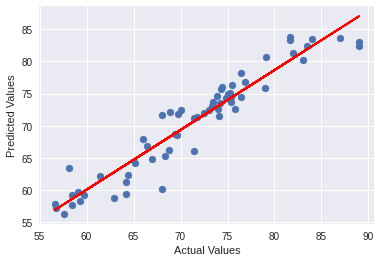

______________
[15:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
9
MSE: 7.029499410994753
RMSE: 2.6513203146724376
R2: 0.8943697475839284


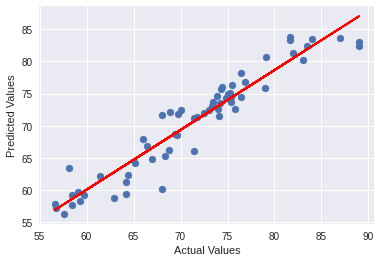

______________
[15:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
8
MSE: 7.253303712647357
RMSE: 2.6931958177316697
R2: 0.8910067051404805


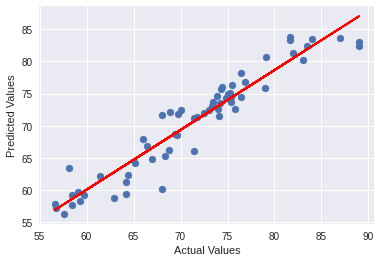

______________
[15:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
7
MSE: 6.999418338182369
RMSE: 2.645641385029794
R2: 0.8948217671557841


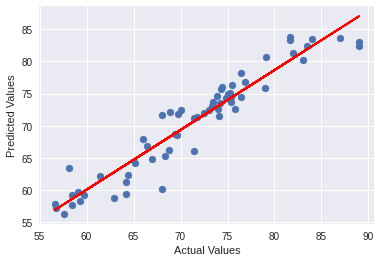

______________
[15:56:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
6
MSE: 6.661820379449292
RMSE: 2.5810502473701074
R2: 0.8998947539377944


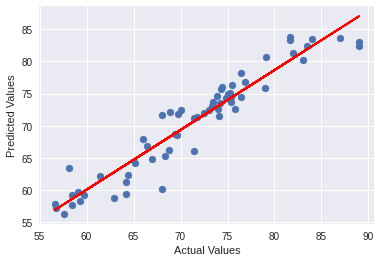

______________
[15:56:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
5
MSE: 6.429804163645767
RMSE: 2.5357058511676325
R2: 0.9033811944376138


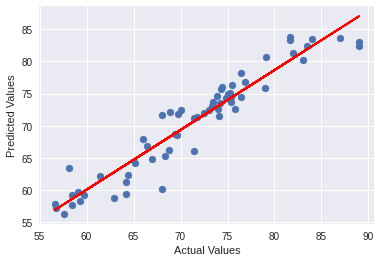

______________
[15:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
4
MSE: 10.618910116352774
RMSE: 3.258666923199236
R2: 0.8404327121473946


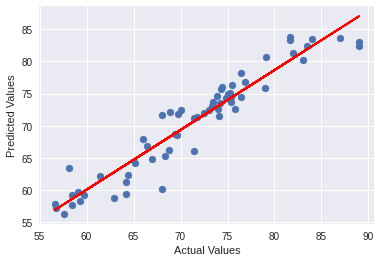

______________
[15:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
3
MSE: 11.29185362348974
RMSE: 3.3603353439038997
R2: 0.8303205849012562


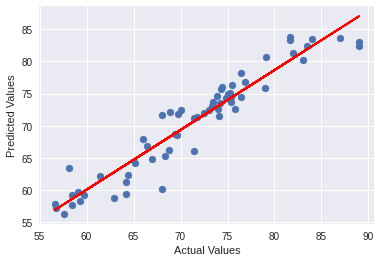

______________
[15:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
2
MSE: 11.650232556646246
RMSE: 3.413243700154773
R2: 0.8249353284332472


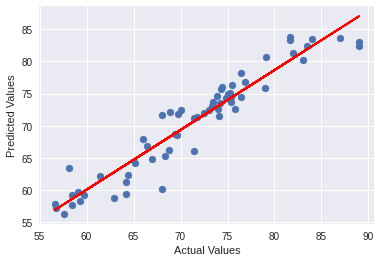

______________
[15:56:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
______________
1
MSE: 31.53285478774589
RMSE: 5.6154122544783736
R2: 0.5261649207311645


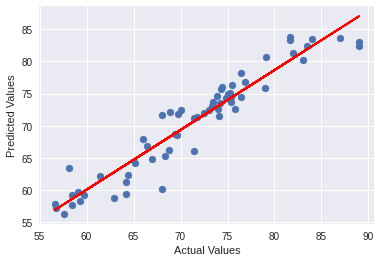

______________


In [36]:
#printing out model matrics for different thresholds (different predictor variables included)
thresholds = sorted(XGB.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(XGB, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
    # train model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(x_test)
    predictions = selection_model.predict(select_X_test)
    print('______________')
    print(len(select_X_train[0]))
    mse_XGB = mean_squared_error(y_test, predictions)
    print("MSE:", mse_XGB)
    rmse_XGB = np.sqrt(mse_XGB)
    print("RMSE:", rmse_XGB)
    r2_XGB = r2_score(y_test, predictions)
    print("R2:", r2_XGB)
    plt.scatter(y_test, y_prediction_XGB)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    z = np.polyfit(y_test, y_prediction_XGB, 1)
    p = np.poly1d(z)
    plt.plot(y_test,p(y_test), color='red')
    plt.show()
    print('______________')

# **RESULT VALIDATION WITH TIME SERIES DATA**



In [37]:
life_expectancy_full = pd.read_csv(io.BytesIO(uploaded['Life Expectancy Data.csv']))
#subsetting the data we need
life_expectancy_full = life_expectancy_full[['Country', 'Year', 'Life expectancy ',' HIV/AIDS', 'Income composition of resources']] 

In [38]:
#getting a list of countries
countries =  list(set(life_expectancy_full['Country']))

In [36]:
#this function will help us plot line plots with two scales (on both y axes)
def plot_relationship(country, variable):

  life_expectancy_set = life_expectancy_full[(life_expectancy_full.Country == country)].iloc[:,0:]
  life_expectancy_set = life_expectancy_set.dropna()
  if len(life_expectancy_set['Life expectancy ']) != 16:
    return('There are missing values')

  fig, host = plt.subplots()
  fig.subplots_adjust(right=0.75)

  par1 = host.twinx()


  p1, = host.plot(np.linspace(2000,2015, 16), life_expectancy_set['Life expectancy '][::-1], "b-", label="Life Expectancy")
  p2, = par1.plot(np.linspace(2000,2015, 16), life_expectancy_set[variable][::-1], "r-", label=variable)


  host.set_xlim(1999, 2016)
  host.set_ylim(min(life_expectancy_set['Life expectancy '][::-1])-5, max(life_expectancy_set['Life expectancy '][::-1])+5)
  par1.set_ylim(min(life_expectancy_set[variable][::-1])-0.05, max(life_expectancy_set[variable][::-1])+0.05)

  host.set_xlabel("Year")
  host.set_ylabel("Life Expectancy")
  par1.set_ylabel(variable)

  host.yaxis.label.set_color(p1.get_color())
  par1.yaxis.label.set_color(p2.get_color())

  tkw = dict(size=4, width=1.5)
  host.tick_params(axis='y', colors=p1.get_color(), **tkw)
  par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
  host.tick_params(axis='x', **tkw)

  lines = [p1, p2]

  host.legend(lines, [l.get_label() for l in lines])

  plt.show()

Ireland


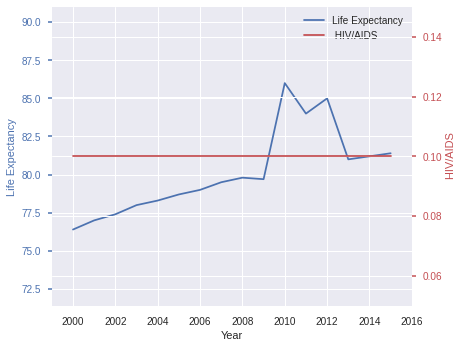

_____________
Philippines


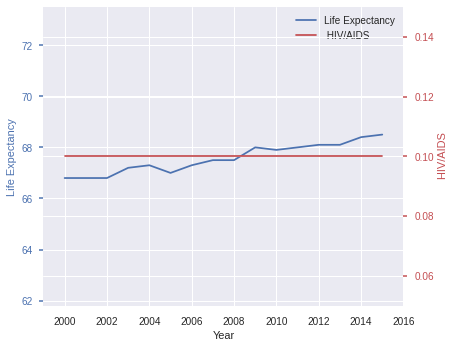

_____________
Solomon Islands


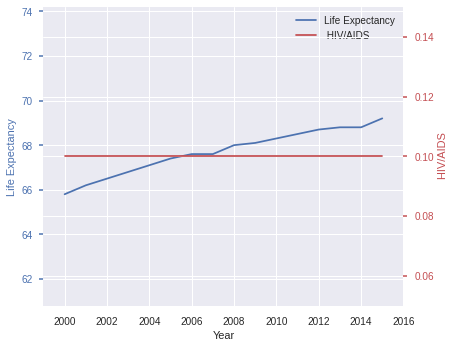

_____________
Jordan


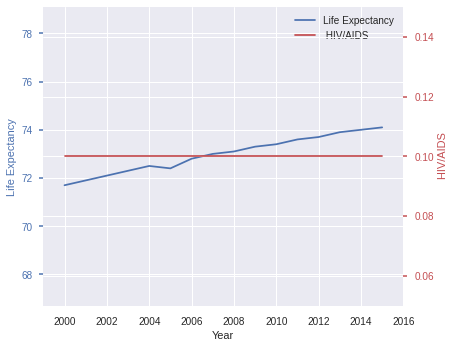

_____________
Democratic People's Republic of Korea
_____________
Nigeria


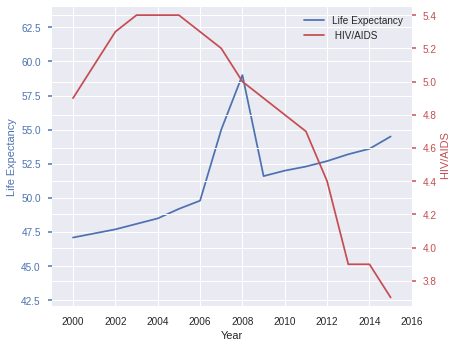

_____________
Mauritius


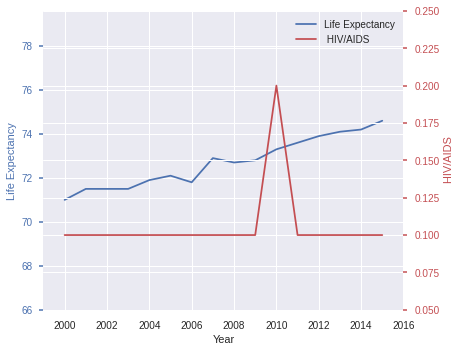

_____________
Argentina


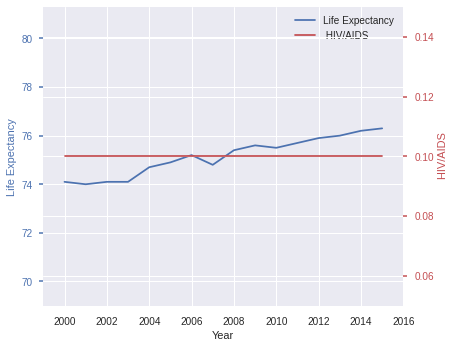

_____________
Croatia


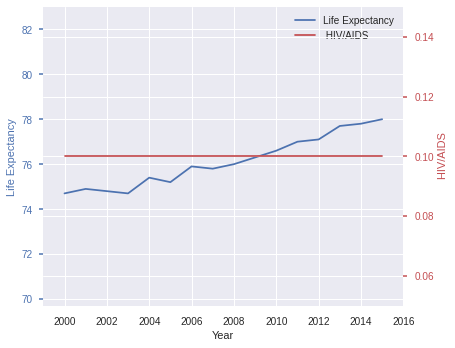

_____________
Cyprus


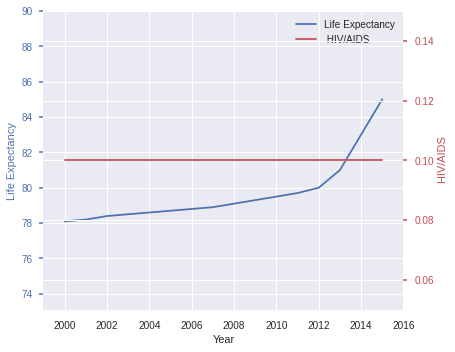

_____________
Tajikistan


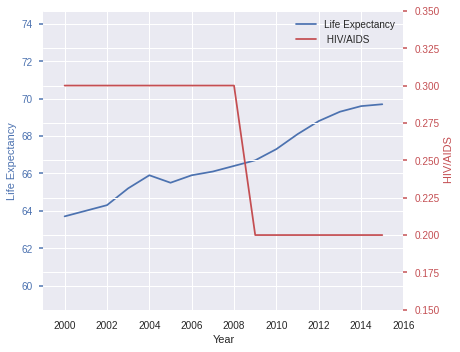

_____________
Zimbabwe


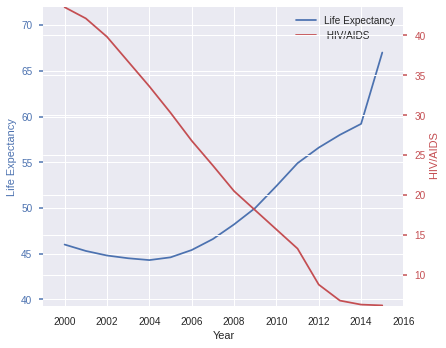

_____________
Democratic Republic of the Congo
_____________
Colombia


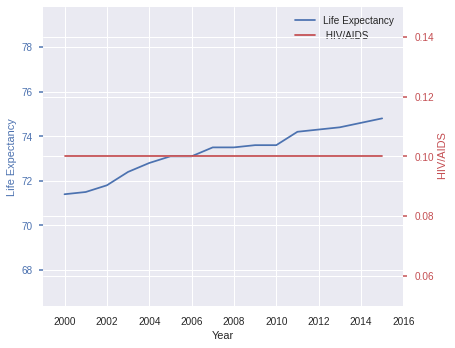

_____________
Ghana


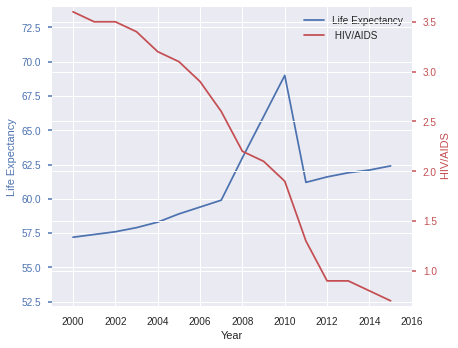

_____________
The former Yugoslav republic of Macedonia


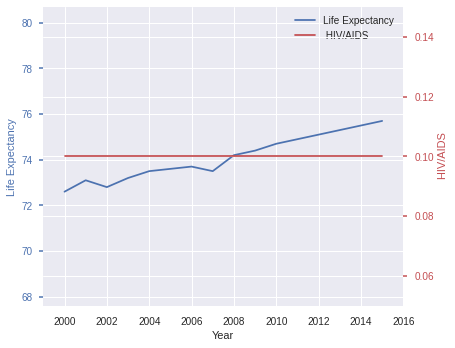

_____________
Yemen


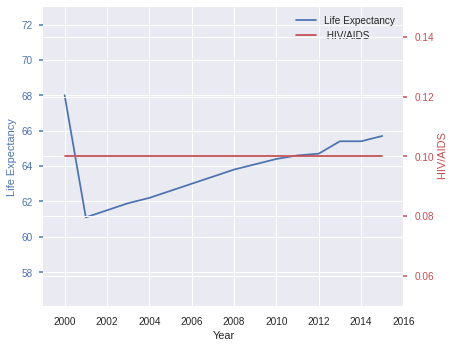

_____________
Nicaragua


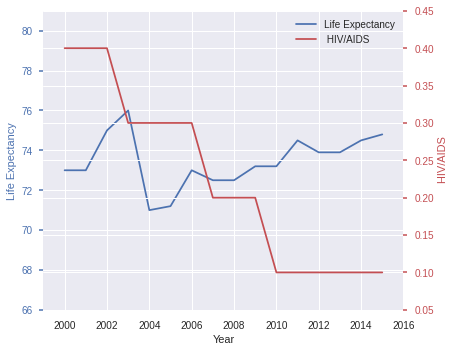

_____________
Papua New Guinea


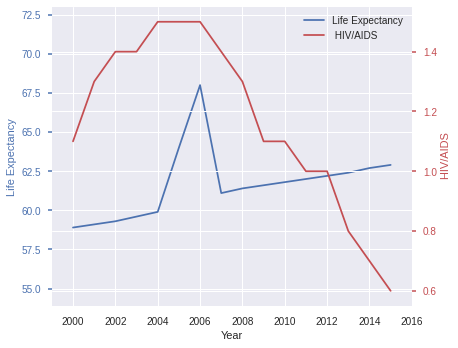

_____________
Viet Nam


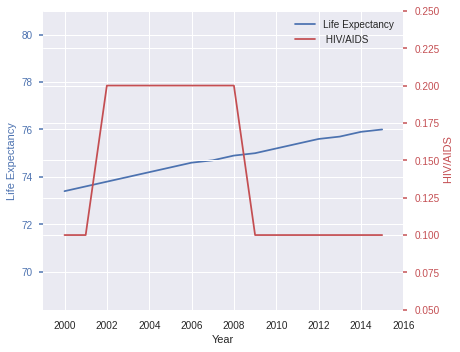

_____________


In [43]:
#plotting for each country
for country in countries:
  print(country)
  plot_relationship(country, 'Income composition of resources')
  print('_____________')

Year: 2000


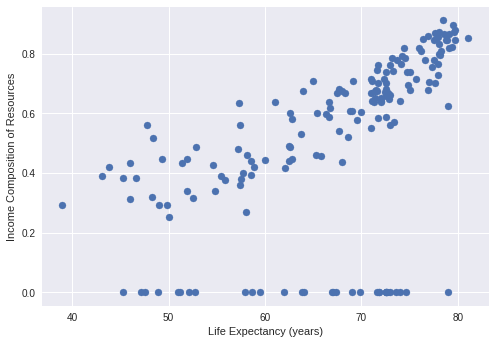

Pearson's R: 0.5414159445211322
________
Year: 2001


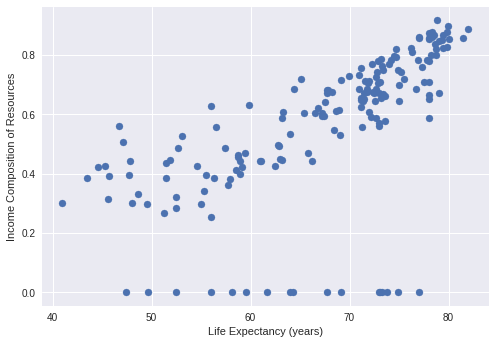

Pearson's R: 0.6143164689761953
________
Year: 2002


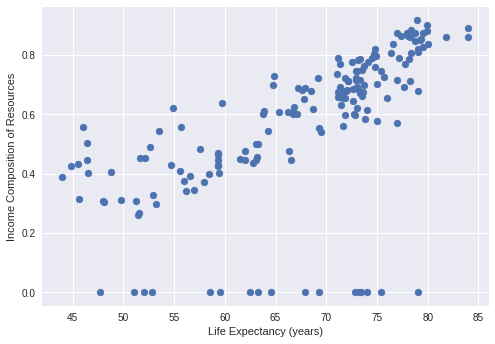

Pearson's R: 0.6118889853076792
________
Year: 2003


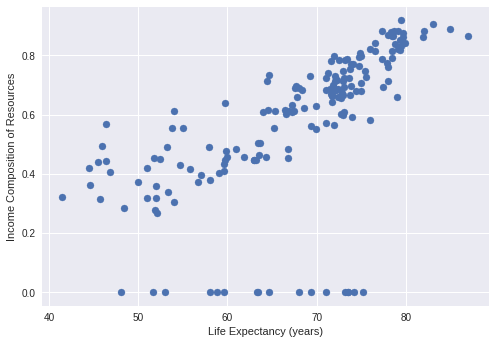

Pearson's R: 0.6186086706988445
________
Year: 2004


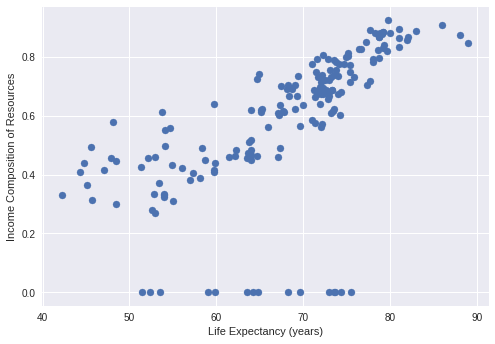

Pearson's R: 0.6285219077497951
________
Year: 2005


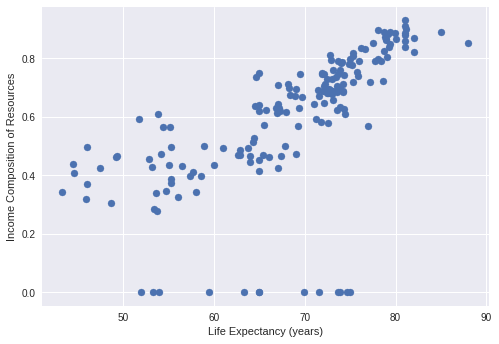

Pearson's R: 0.6397214116332909
________
Year: 2006


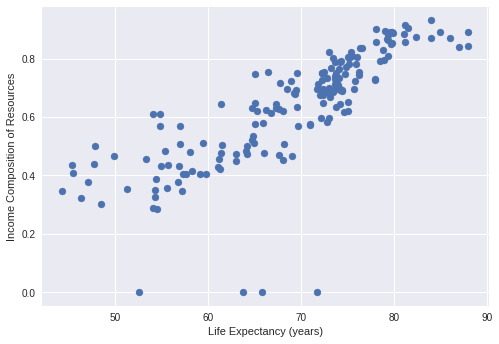

Pearson's R: 0.7997309216845262
________
Year: 2007


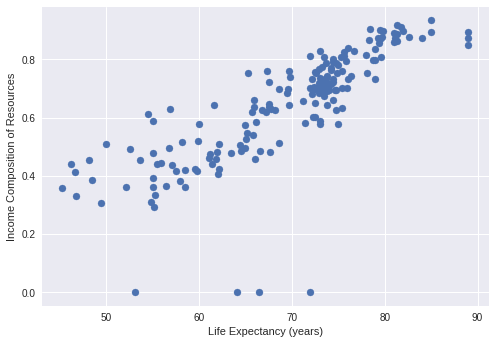

Pearson's R: 0.8000124377255745
________
Year: 2008


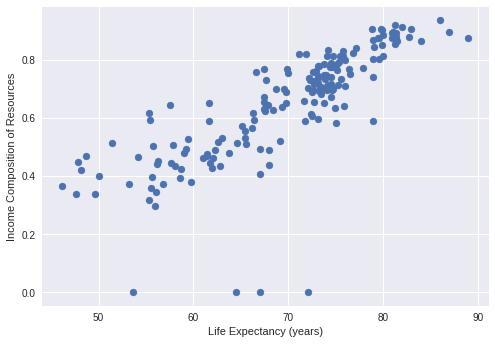

Pearson's R: 0.7925755486701725
________
Year: 2009


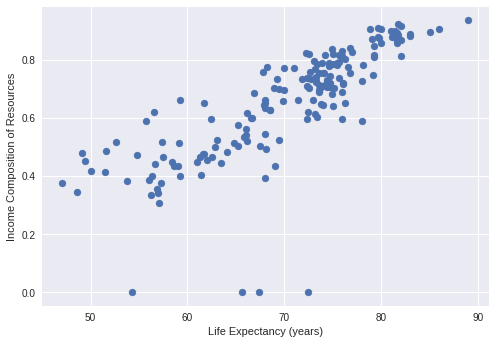

Pearson's R: 0.7859152536591584
________
Year: 2010


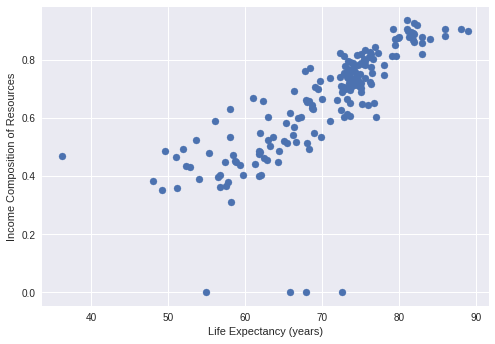

Pearson's R: 0.781423631863018
________
Year: 2011


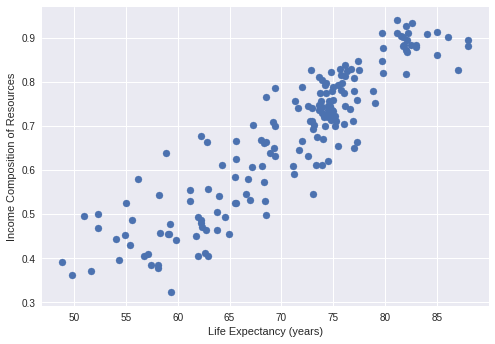

Pearson's R: 0.9033877343643606
________
Year: 2012


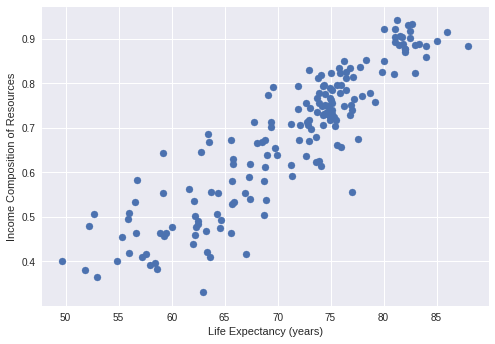

Pearson's R: 0.8985705150697526
________
Year: 2013


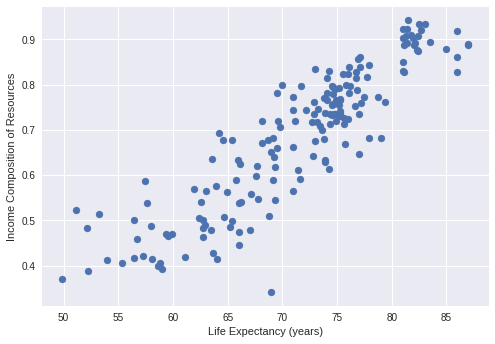

Pearson's R: 0.890893841051585
________
Year: 2014


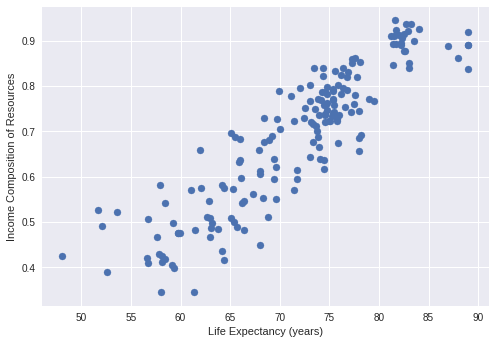

Pearson's R: 0.8949538027511348
________
Year: 2015


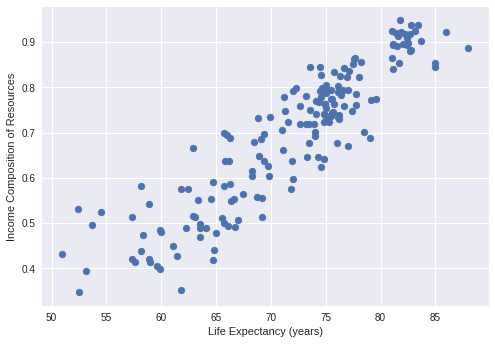

Pearson's R: 0.9073638602395788
________


In [16]:
#plotting scatterplots for both independents variables and the dependent variable
for i in range(16):
  life_expectancy_set = life_expectancy_full[(life_expectancy_full.Year == 2000+i)].iloc[:,0:]
  life_expectancy_set = life_expectancy_set.dropna()
  print('Year:', 2000+i)
  plt.figure()
  plt.scatter(life_expectancy_set['Life expectancy '], life_expectancy_set['Income composition of resources'])
  plt.xlabel('Life Expectancy (years)')
  plt.ylabel('Income Composition of Resources')
  plt.show()
  print("Pearson's R:", pearsonr(life_expectancy_set['Life expectancy '], life_expectancy_set['Income composition of resources'])[0])
  print('________')

Year: 2000


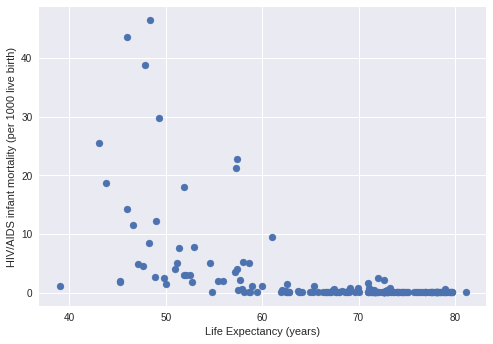

Pearson's R: -0.5529909110031254
________
Year: 2001


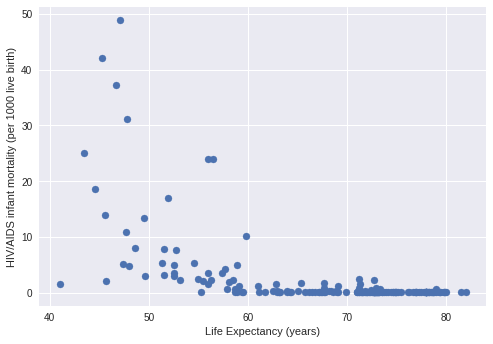

Pearson's R: -0.5828132715692109
________
Year: 2002


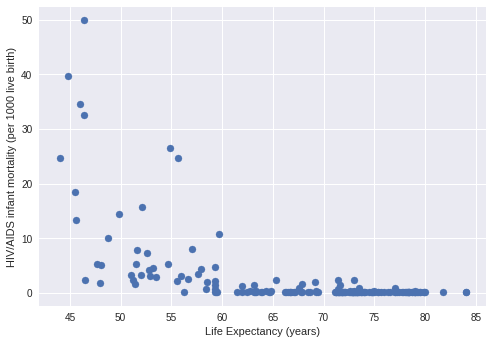

Pearson's R: -0.5989030163588924
________
Year: 2003


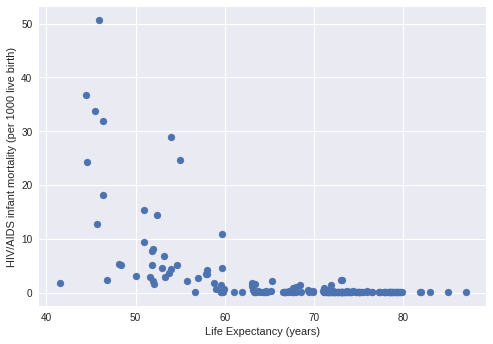

Pearson's R: -0.6001622656374973
________
Year: 2004


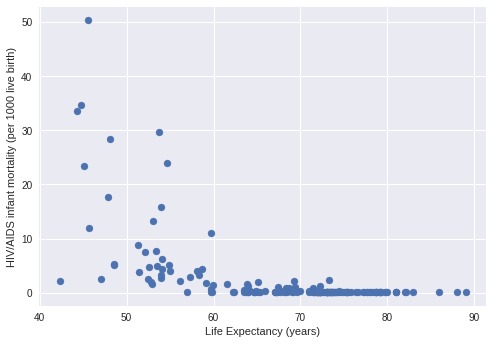

Pearson's R: -0.6018770050396339
________
Year: 2005


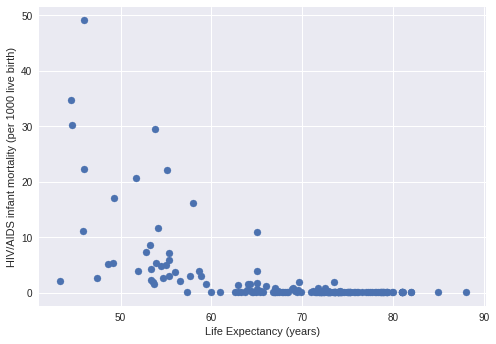

Pearson's R: -0.6065543621470527
________
Year: 2006


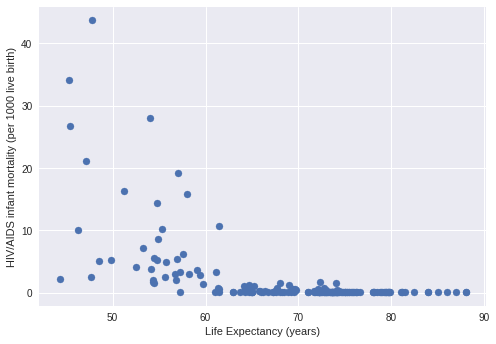

Pearson's R: -0.5936058482901609
________
Year: 2007


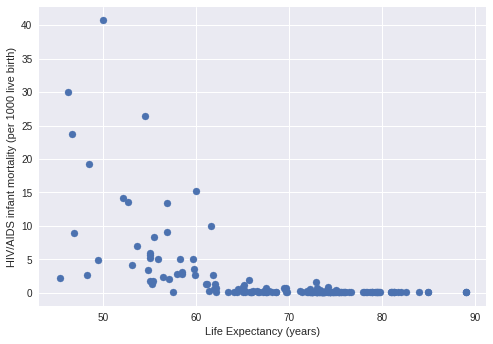

Pearson's R: -0.5918758141268979
________
Year: 2008


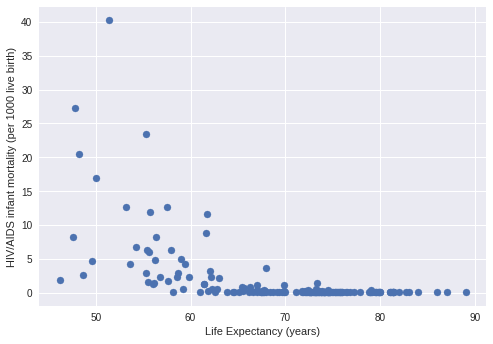

Pearson's R: -0.5764573611221233
________
Year: 2009


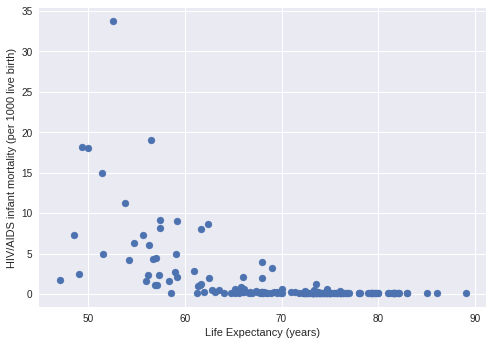

Pearson's R: -0.5866226307802322
________
Year: 2010


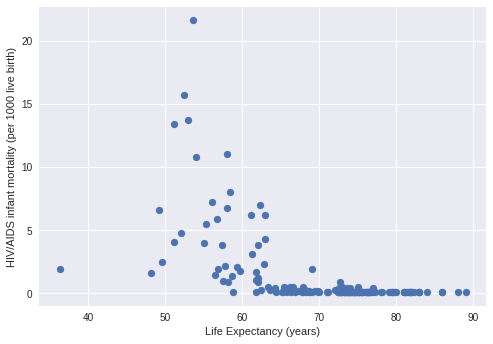

Pearson's R: -0.5982014862770736
________
Year: 2011


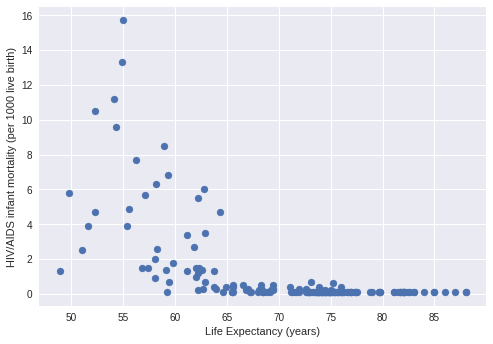

Pearson's R: -0.628634685302979
________
Year: 2012


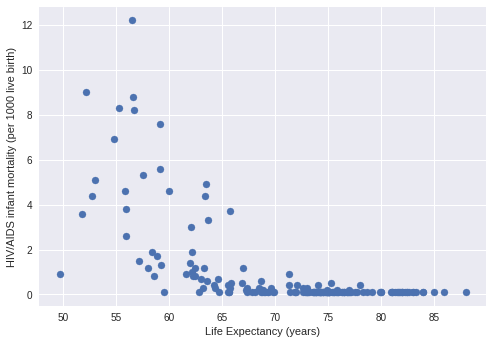

Pearson's R: -0.6444128914592813
________
Year: 2013


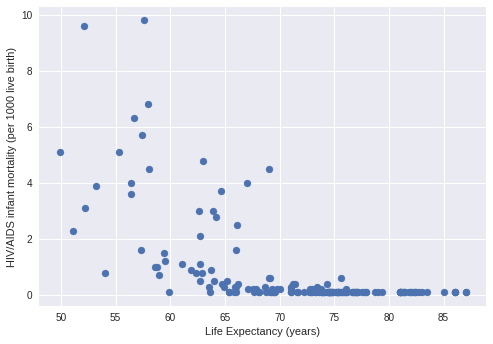

Pearson's R: -0.6296867949464694
________
Year: 2014


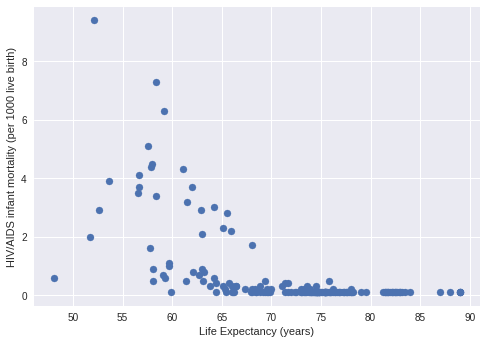

Pearson's R: -0.61482827389127
________
Year: 2015


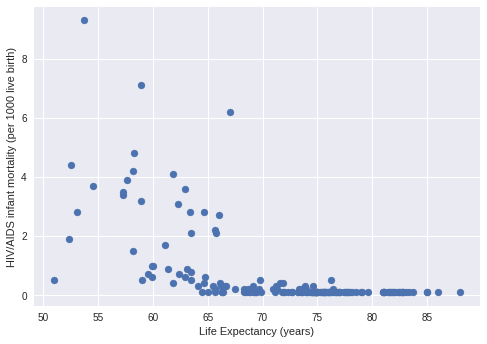

Pearson's R: -0.6138783779319503
________


In [17]:
for i in range(16):
  life_expectancy_set = life_expectancy_full[(life_expectancy_full.Year == 2000+i)].iloc[:,0:]
  life_expectancy_set = life_expectancy_set.dropna()
  print('Year:', 2000+i)
  plt.figure()
  plt.scatter(life_expectancy_set['Life expectancy '], life_expectancy_set[' HIV/AIDS'])
  plt.xlabel('Life Expectancy (years)')
  plt.ylabel('HIV/AIDS infant mortality (per 1000 live birth)')
  plt.show()
  print("Pearson's R:", pearsonr(life_expectancy_set['Life expectancy '], life_expectancy_set[' HIV/AIDS'])[0])
  print('________')